In [334]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.model_selection import train_test_split
%matplotlib inline

In [335]:
# We read the parquet and turn it into a dataframe
df = pd.read_parquet('df.parquet.gzip')  

In [336]:
'''
Logistic Regression
'''

'\nLogistic Regression\n'

In [337]:
# We create a new dataframe
dfLR = df

In [338]:
# Careful to only run this operation once
dfLR['Rating'].where((dfLR['Rating'] > 3.5), 0, inplace=True)
dfLR['Rating'].where(dfLR['Rating'] <= 3.5, 1, inplace=True)

In [339]:
# dfLR['Ratio'].mean()
# dfLR['Players'].mean()

In [340]:
# dfLR[['Ratio', 'Players']].sub([.35, 50000], axis='columns')

In [341]:
# dfLR["Rating"] = np.sign(df["Rating"]).astype(int)
# dfLR['Rating'].head(50)
# criteria = dfLR[dfLR['Rating'] == 1]
# criteria

In [342]:
# Variable output
y = dfLR['Rating']
# Variable inputs
X = dfLR.drop(columns = ['Game', 'AvgCompleted', 'Time', 'Rating', 'MaxGameScore', 'AvgGameScore'])

# We create the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)

X

,Ratio,Players
0,0.535649,84143.0
1,0.507365,213257.0
2,0.744915,221178.0
3,0.329381,51530.0
4,0.595948,71981.0
...,...,...
440,0.638978,1250.0
445,0.125676,9309.0
446,0.210040,5618.0
447,0.415942,1733.0


In [343]:
# We import the model for Logistic Regression
from sklearn.linear_model import LogisticRegression

# We create an empty model
log_model = LogisticRegression()
# We train the model with 80% of the available data
log_model.fit(X_train,y_train)
# We use the available 20% for test
y_pred = log_model.predict(X_test)

In [344]:
comp_t = pd.DataFrame({'Test': y_test})
comp_t.reindex(method='bfill')
comp_t.index = range(comp_t.shape[0])
comp_p = pd.DataFrame({'Pred': y_pred})

#print(comp_t,round(comp_p,1))

comp = pd.merge(comp_t,comp_p,left_index=True, right_index=True)
comp

,Test,Pred
0,0.0,1.0
1,1.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
79,1.0,1.0
80,1.0,1.0
81,1.0,1.0
82,1.0,1.0


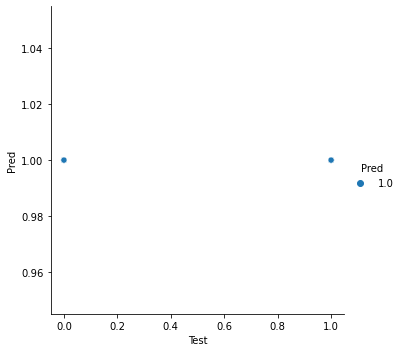

In [345]:
# Graficar Datos Prueba vs Datos Predictivos
import seaborn as sns

sns.relplot(x='Test',y='Pred',data=comp, hue="Pred")

In [346]:
# import for the confusion matrix
from sklearn.metrics import confusion_matrix
# Create confusion matrix
cmatrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

In [347]:
# Extract values from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  0
False Positives:  32
False Negatives:  0
True Positives:  52


In [348]:
# Accuracy (%) 
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 

print("Accuracy {:0.2f}%".format(Accuracy))

Accuracy 61.90%


In [349]:
# Precision
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

Precision 0.62


In [350]:
# Specificity 

Specificity = tn/(tn+fp)
print("Specificity {:0.2f}".format(Specificity))

Specificity 0.00


In [367]:
y_pred = y_pred.astype(float)
y_pred = pd.DataFrame(y_pred)

y_test = y_test.astype(float)
y_test = pd.DataFrame(y_test)

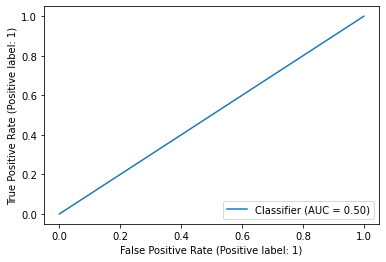

In [370]:
import scikitplot as skplt
from sklearn.metrics import RocCurveDisplay

# Compare prediction against training
RocCurveDisplay.from_predictions(y_test, y_pred)


plt.show()